# mount google drive

In [113]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# set working directory

In [114]:
import os
os.chdir("/home/michael/github/CC0325/codes/matmat/")

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
# set theme, white background
sns.set_theme(style="whitegrid")

In [116]:
def plot_polynomial_fit(df, column_name, column_values, degree=2):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df[column_name], df[column_values], degree)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    sns.scatterplot(data=df, x=column_name, y=column_values, marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    sns.lineplot(data=df, x=column_name, y=poly(df[column_name]), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()


In [120]:
!make clean
!make run

# read the output file
df = pd.read_csv('output.txt')
df.head()

rm -f matmat.bin


g++ -std=c++11 -Wall -Wextra -O2 matmat.cpp -lblas -o matmat.bin
./matmat.bin
MatrixSize,BlockSize,Time(us)
200, 1, 8171
200, 4, 7187
200, 8, 6398
200, 16, 5042
200, 32, 4601
200, 64, 4892
300, 1, 29763
300, 4, 23087
300, 8, 17917
300, 16, 16576
300, 32, 15049
300, 64, 14939
400, 1, 69876
400, 4, 48763
400, 8, 39497
400, 16, 34012
400, 32, 31364
400, 64, 32958
500, 1, 131319
500, 4, 112069
500, 8, 89032
500, 16, 76600
500, 32, 68854
500, 64, 67948
600, 1, 229814
600, 4, 184421
600, 8, 150132
600, 16, 129398
600, 32, 114637
600, 64, 115695
700, 1, 414826
700, 4, 320945
700, 8, 248608
700, 16, 215190
700, 32, 190183
700, 64, 186662
750, 1, 488040
750, 4, 343869
750, 8, 272180
750, 16, 234911
750, 32, 211580
750, 64, 207647
800, 1, 593682
800, 4, 415870
800, 8, 327298
800, 16, 288935
800, 32, 272119
800, 64, 262915
850, 1, 798650
850, 4, 474419
850, 8, 382266
850, 16, 328561
850, 32, 287091
850, 64, 285918
900, 1, 902041
900, 4, 570629
900, 8, 475026
900, 16, 412660
900, 32, 363024
900, 6

,MatrixSize,BlockSize,Time(us)
0,200,1,8171
1,200,4,7187
2,200,8,6398
3,200,16,5042
4,200,32,4601


Polynomial Fit Equation: Poly(0.0019809662304185*x**3 - 0.947147071885131*x**2 + 299.897451357664*x - 28797.7701700426, x, domain='RR')


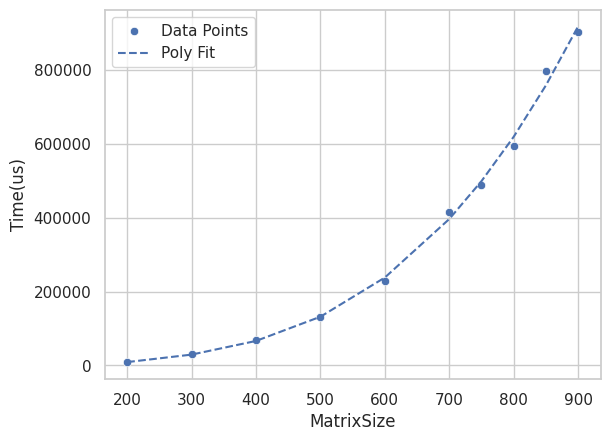

In [121]:
df_filtered = df[df['BlockSize'] == 1]
plot_polynomial_fit(df_filtered, 'MatrixSize', 'Time(us)', degree=3)

In [123]:
# Create a speedup dataframe for each block size
df.sort_values(by=['MatrixSize', 'BlockSize'], inplace=True)
df_speedup = {"MatrixSize": []}
for _, row in df.iterrows():
    matrix_size = row["MatrixSize"]
    if matrix_size not in df_speedup["MatrixSize"]:
        df_speedup["MatrixSize"].append(matrix_size)
    block_size = str(row["BlockSize"])
    if block_size not in df_speedup:
        df_speedup[block_size] = []
    df_speedup[block_size].append(row["Time(us)"])
df_speedup = pd.DataFrame(df_speedup)
df_speedup.head()

for block_size in df_speedup.columns[2:]:
    df_speedup[block_size] = df_speedup['1'] / df_speedup[block_size]

df_speedup


,MatrixSize,1,4,8,16,32,64
0,200,8171,1.136914,1.277118,1.620587,1.775918,1.670278
1,300,29763,1.289167,1.661160,1.795548,1.977739,1.992302
2,400,69876,1.432972,1.769147,2.054451,2.227905,2.120153
3,500,131319,1.171769,1.474964,1.714347,1.907209,1.932640
4,600,229814,1.246138,1.530746,1.776024,2.004711,1.986378
5,700,414826,1.292514,1.668595,1.927720,2.181194,2.222338
6,750,488040,1.419261,1.793078,2.077553,2.306645,2.350335
7,800,593682,1.427566,1.813888,2.054725,2.181700,2.258076
8,850,798650,1.683428,2.089252,2.430751,2.781871,2.793283
9,900,902041,1.580784,1.898930,2.185918,2.484797,2.494748


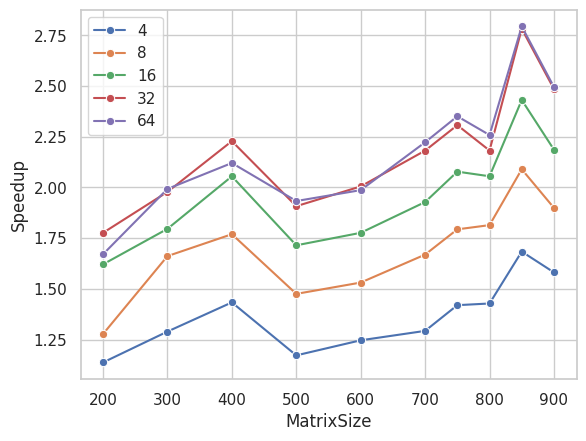

In [132]:
# lineplot for all columns except MatrixSize    
for block_size in df_speedup.columns[2:]:
    sns.lineplot(data=df_speedup, x='MatrixSize', y=block_size, label=block_size, marker='o')
plt.ylabel('Speedup')
plt.legend()
plt.show()